In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=39224869eb94dab4c3c242134307dfe285d120751cdf9d166a3d515cf7b622ab
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [1]:
from pyspark import SparkContext

In [2]:
sc=SparkContext("local", "PySparkIntro")

In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("PySparkIntro").getOrCreate()

In [4]:
data=[1,2,3,4,5]
rdd=sc.parallelize(data)

In [5]:
squared_rdd=rdd.map(lambda x:x**2)
squared_rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

In [6]:
even_rdd=rdd.map(lambda x:x%2==0)
even_rdd

PythonRDD[2] at RDD at PythonRDD.scala:53

In [7]:
collected_data=squared_rdd.collect()
collected_data

[1, 4, 9, 16, 25]

In [8]:
num_element=squared_rdd.count()
num_element

5

In [9]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [10]:
schema=StructType([
    StructField("Name",StringType(),True),
    StructField("Age",IntegerType(),True),
    StructField("Salary",IntegerType(),True)
])

In [11]:
data=[("Alice", 28, 45000),("Bob", 36, 60000)]

In [12]:
ds=spark.createDataFrame(data,schema)

In [13]:
ds=ds.alias('Employees')

In [14]:
ds.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 36| 60000|
+-----+---+------+



In [15]:
df=spark.read.csv("/content/data1.csv",header=True, inferSchema=True)
df

DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: int, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

In [17]:
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [18]:
mean_age=df.select("Age").agg({"Age":"avg"}).collect()[0][0]
mean_fare=df.select("Fare").agg({"Fare":"avg"}).collect()[0][0]

In [19]:
df_cleaned=df.na.fill(mean_age,subset=["Age"])
df_cleaned=df_cleaned.na.fill(mean_fare,subset=["Fare"])

In [20]:
df_cleaned.show()

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male| 27|    0|    0|          33087

In [21]:
from pyspark.ml.feature import MinMaxScaler, StandardScaler, VectorAssembler
from pyspark.ml.feature import VectorAssembler

In [22]:
assembler=VectorAssembler(inputCols=['Age','Fare'],outputCol='Features')
assembled_df = assembler.transform(df_cleaned)

In [23]:
assembled_df.show()

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|      Features|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| NULL|       S|   [22.0,7.25]|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|[38.0,71.2833]|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|  [26.0,7.925]|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|   [35.0,53.1]|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05

In [24]:


# MinMaxScaler
min_max_scaler = MinMaxScaler(inputCol="Features", outputCol="minmax_scaled_features")
min_max_model = min_max_scaler.fit(assembled_df)
min_max_scaled_df = min_max_model.transform(assembled_df)



In [25]:
min_max_scaled_df.show()

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+----------------------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|      Features|minmax_scaled_features|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+----------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| NULL|       S|   [22.0,7.25]|  [0.3125,9.7742156...|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|[38.0,71.2833]|  [0.5625,0.2504478...|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|  [26.0,7.925]|  [0.375,0.00273678...|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          11380

In [26]:

# StandardScaler
standard_scaler = StandardScaler(inputCol="Features", outputCol="standard_scaled_features", withStd=True, withMean=True)
standard_model = standard_scaler.fit(assembled_df)
standard_scaled_df = standard_model.transform(assembled_df)



In [27]:
standard_scaled_df.show()

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+------------------------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|      Features|standard_scaled_features|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+--------------+------------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| NULL|       S|   [22.0,7.25]|    [-0.3863425954613...|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|[38.0,71.2833]|    [0.784885483411,1...|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|  [26.0,7.925]|    [-0.0935355757432...|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|   

In [35]:
# Splitting data into training and test sets
train_data, test_data = standard_scaled_df.randomSplit([0.7, 0.3])



In [37]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol='standard_scaled_features', labelCol='Survived')
# Training the model
model = rf.fit(train_data)
# Making predictions on test data
predictions = model.transform(test_data)

# Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol='Survived', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

precision_recall_f1 = MulticlassClassificationEvaluator(labelCol='Survived', metricName='weightedPrecision')\
                        .evaluate(predictions),\
                    MulticlassClassificationEvaluator(labelCol='Survived', metricName='weightedRecall')\
                        .evaluate(predictions),\
                    MulticlassClassificationEvaluator(labelCol='Survived', metricName='f1')\
                        .evaluate(predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_recall_f1[0]}")
print(f"Recall: {precision_recall_f1[1]}")
print(f"F1-score: {precision_recall_f1[2]}")

Accuracy: 0.38095238095238093
Precision: 0.3979591836734694
Recall: 0.38095238095238093
F1-score: 0.36678653154625696


In [34]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

# Selecting relevant columns
selected_cols = ['Survived', 'Age', 'Fare']
df_selected = df_cleaned.select(selected_cols)

# Defining the feature columns
feature_cols = ['Age', 'Fare']

# Creating a VectorAssembler to assemble feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='unscaled_features')

# Applying StandardScaler
scaler = StandardScaler(inputCol='unscaled_features', outputCol='features', withStd=True, withMean=True)

# Creating a Random Forest classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='Survived')

# Creating a pipeline with VectorAssembler, StandardScaler, and RandomForestClassifier
pipeline = Pipeline(stages=[assembler, scaler, rf])

# Splitting data into training and test sets
train_data, test_data = df_selected.randomSplit([0.7, 0.3])

# Fitting the pipeline on training data
model = pipeline.fit(train_data)

# Making predictions on test data
predictions = model.transform(test_data)

# Showing predictions
predictions.select('Survived', 'prediction', 'probability').show()

# Evaluating the model (if you have labels for the test data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='Survived', metricName='areaUnderROC')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

+--------+----------+--------------------+
|Survived|prediction|         probability|
+--------+----------+--------------------+
|       0|       1.0|[0.20820707070707...|
|       0|       1.0|[0.47873965216070...|
|       0|       1.0|[0.47873965216070...|
|       0|       1.0|[0.29712349054454...|
|       0|       1.0|[0.48608452950558...|
|       0|       0.0|[0.79801634768740...|
|       1|       0.0|     [0.6875,0.3125]|
|       1|       0.0|[0.71862373737373...|
|       1|       1.0|[0.24195707070707...|
|       1|       1.0|[0.26517543859649...|
|       1|       0.0|[0.95426634768740...|
|       1|       0.0|[0.97093301435406...|
+--------+----------+--------------------+

Accuracy: 0.3333333333333333


In [28]:
description = df_cleaned.describe(['Age','Fare'])
description.show()

+-------+-----------------+------------------+
|summary|              Age|              Fare|
+-------+-----------------+------------------+
|  count|               54|                54|
|   mean|27.27777777777778| 28.61087962962963|
| stddev|13.66087467387597|40.969309876818585|
|    min|                2|             7.225|
|    max|               66|             263.0|
+-------+-----------------+------------------+



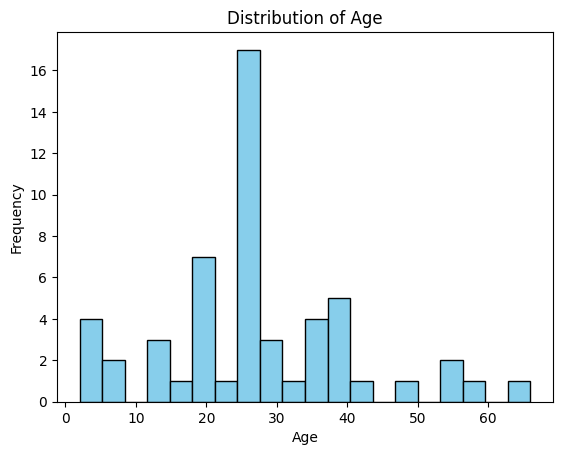

In [29]:
import matplotlib.pyplot as plt
age_data = df_cleaned.select('Age').toPandas()
plt.hist(age_data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [30]:
from pyspark.sql.functions import avg

# Calculate the average salary
average_salary = df_cleaned.select(avg("Age"))

# Show the average salary
average_salary.show()

+-----------------+
|         avg(Age)|
+-----------------+
|27.27777777777778|
+-----------------+



In [31]:
from pyspark.sql.functions import avg

# Calculate the average salary
average_salary = df_cleaned.select(avg("Fare"))

# Show the average salary
average_salary.show()

+-----------------+
|        avg(Fare)|
+-----------------+
|28.61087962962963|
+-----------------+



In [32]:
from pyspark.sql.functions import avg, max
result = df_cleaned.groupBy('Age').agg(avg('Fare').alias('AvgFare'), max('Fare').alias('MaxFare'))
result.show()

+---+---------+--------+
|Age|  AvgFare| MaxFare|
+---+---------+--------+
| 31|     18.0|    18.0|
| 34|     13.0|    13.0|
| 28|  58.8354| 82.1708|
| 26|    7.925|   7.925|
| 27|19.136975|146.5208|
| 22|     7.25|    7.25|
|  3|  41.5792| 41.5792|
| 20|     8.05|    8.05|
| 40|  18.5979| 27.7208|
| 54|  51.8625| 51.8625|
| 19| 135.4396|   263.0|
| 15|   8.0292|  8.0292|
| 35|    29.05|    53.1|
|  4|     16.7|    16.7|
| 55|     16.0|    16.0|
|  8|   21.075|  21.075|
| 39|   31.275|  31.275|
| 49|  76.7292| 76.7292|
|  7|  39.6875| 39.6875|
| 38|  51.3354| 71.2833|
+---+---------+--------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("WordCount").getOrCreate()

# Read a text file into an RDD
lines = spark.sparkContext.textFile("path/to/your/textfile.txt")

# Split each line into words and flatten the results
words = lines.flatMap(lambda line: line.split())

# Map each word to a tuple of (word, 1) for counting
word_counts = words.map(lambda word: (word, 1))

# Aggregate the word counts
word_counts = word_counts.reduceByKey(lambda x, y: x + y)

# Collect the results and print the word counts
result = word_counts.collect()
for word, count in result:
    print(f"{word}: {count}")

# Stop the SparkSession
spark.stop()


**Parallelism**: The flatMap() and reduceByKey() functions apply transformations to data in parallel across different partitions of the dataset.

**Distributed** **Computing**: Spark breaks down the operations into tasks and executes them across a cluster of nodes.

**Challenges**: While this example doesn't explicitly handle challenges like fault tolerance or optimization, Spark provides fault tolerance by recomputing lost partitions and offers optimization techniques for better performance.

In [38]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, HashingTF, IDF

# Create a SparkSession
spark = SparkSession.builder.appName("TF-IDF").getOrCreate()

# Sample document data
data = [("1", "This is an example of document 1"),
        ("2", "Another example of document 2"),
        ("3", "And a third document example")]

# Create a DataFrame with document id and text
df = spark.createDataFrame(data, ["document_id", "text"])

# Tokenize the text into words
tokenizer = Tokenizer(inputCol="text", outputCol="words")
words_df = tokenizer.transform(df)

# Calculate Term Frequency (TF)
hashing_tf = HashingTF(inputCol="words", outputCol="raw_tf", numFeatures=20)
tf_df = hashing_tf.transform(words_df)

# Calculate Inverse Document Frequency (IDF)
idf = IDF(inputCol="raw_tf", outputCol="tf_idf")
idf_model = idf.fit(tf_df)
tf_idf_df = idf_model.transform(tf_df)

# Select relevant columns and display results
result = tf_idf_df.select("document_id", "text", "tf_idf")
result.show(truncate=False)

# Stop the SparkSession
spark.stop()


+-----------+--------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+
|document_id|text                            |tf_idf                                                                                                                             |
+-----------+--------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+
|1          |This is an example of document 1|(20,[0,6,9,10,11,13,15],[0.0,0.0,0.6931471805599453,0.6931471805599453,0.28768207245178085,0.6931471805599453,0.28768207245178085])|
|2          |Another example of document 2   |(20,[0,6,12,15],[0.0,0.0,0.6931471805599453,0.28768207245178085])                                                                  |
|3          |And a third document example    |(20,[0,6,7,11],[0.0,0.0,0.6931471805599453,0.57536414490356

In [39]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("DistributedComputingExample").getOrCreate()

# Sample data to parallelize
data = [1, 2, 3, 4, 5]

# Parallelize the data
distributed_data = spark.sparkContext.parallelize(data)

# Perform a computation (sum) using distributed computing
result = distributed_data.reduce(lambda x, y: x + y)

print("Result of the distributed computation:", result)

# Stop the Spark session
spark.stop()


Result of the distributed computation: 15


**Spark Session Creation**: SparkSession is initialized, creating an entry point to Spark.

**Sample Data Creation**: A list of integers [1, 2, 3, 4, 5] is created. This represents the dataset that needs to be processed.

**Parallelization**: The parallelize() function takes the list of data and distributes it across the Spark cluster. In this case, let's say the cluster has multiple nodes. Each element of the list (integer) is considered an individual task, and these tasks are distributed across the nodes in the cluster. For example:

Element 1 goes to Node 1

Element 2 goes to Node 2

Element 3 goes to Node 3

And so on...

**Computation (Reduce Operation)**: The reduce() function is applied to the distributed data (distributed_data). This function is used to aggregate the elements of the dataset. In this case, it's summing up all the elements by performing a binary operation (the lambda function lambda x, y: x + y) in a tree-like way across the cluster.

The operation might look like:

Node 1: 1 + 2 = 3

Node 2: 3 + 3 = 6

Node 3: 6 + 4 = 10

Node 4: 10 + 5 = 15

The final result 15 is the aggregated value computed across the cluster.
Output: Finally, the result of the distributed computation is printed.